# Neural Network
Only support classification tasks

### Linear Layers (The Basics)

In [1]:
include("../tools.jl")
import .JuTools
import Random
import Printf
import Plots

In [2]:
X_train, Y_train = JuTools.data_generate_linear_2d(random_scale=10.0)
I = X_train
Y = Y_train
size(I), size(Y)

((1000, 2), (1000,))

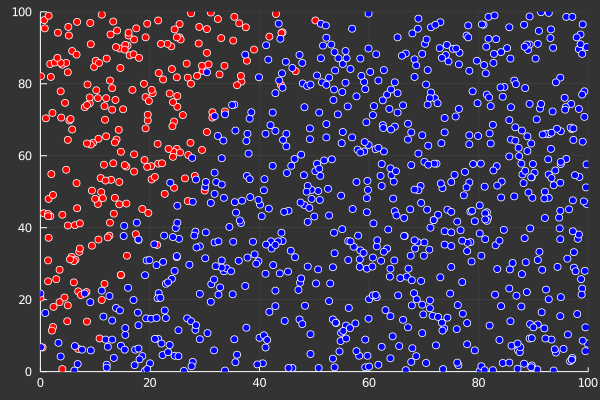

In [3]:
# plot the data
plot1 = X_train[Y_train .== 0, :]
plot2 = X_train[Y_train .== 1, :]
Plots.gr()
Plots.scatter(plot1[:, 1], plot1[:, 2], leg=false, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot2[:, 1], plot2[:, 2], leg=false, c="blue")
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

In [4]:
W₁ = Random.randn((size(X_train)[2], 10)) ./ 1000 # input layer (weights)
b₁ = zeros((1, 10))                               # input layer (biases)
W₂ = Random.randn((10, 5)) ./ 1000                # hidden layer (weights)
b₂ = zeros((1, 5))                                # hidden layer (biases)
W₃ = Random.randn((5, 1)) ./ 1000                 # output layer (weights)
b₃ = zeros((1, 1))                                # output layer (biases)
size(W₁), size(W₂), size(W₃)

((2, 10), (10, 5), (5, 1))

$$\text{MSE}=\frac{1}{2n}\sum^n_{i=1}(Y_i-\hat{Y}_i)^2$$

In [5]:
# define a loss function (MSE)
function loss(Y::AbstractArray, Ŷ::AbstractArray)
    @assert size(Y) == size(Ŷ)
    N = size(Y)[1]
    L = (Y .- Ŷ) .^ 2
    return sum(L) / (N * 2)
end

loss (generic function with 1 method)

$$C=\frac{1}{2n}\sum^n_{i=1}(\hat{Y} - Y)^2$$  

------

$$\hat{Y} = I_3\cdot W_3+b_3$$  

------

$$I_3 = I_2\cdot W_2+b_2$$  

------

$$I_2 = I\cdot W_1+b_1$$  
where $C$ is cost, $Y$ is true target, $W_i$ is the weights of layer $i$, $b_i$ is the biases of layer $i$, and $I$ is input data

In [6]:
# forward pass
I₂ = I  * W₁ .+ b₁
I₃ = I₂ * W₂ .+ b₂
Ŷ  = I₃ * W₃ .+ b₃
Ŷ  = reshape(Ŷ, :)
loss(Y, Ŷ)

0.3799997847840379

Then we can compute gradient for each variable:  

------

$$
\begin{aligned}
\frac{\partial C}{\partial W_3} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial W_3} \\
&= \frac{1}{n}\sum^n_{i=1} (\hat{Y}-Y) \cdot (I_3) \\
\end{aligned}
$$

------

$$
\begin{aligned}
\frac{\partial C}{\partial b_3} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial b_3} \\
&= \frac{1}{n}\sum^n_{i=1}(\hat{Y}-Y) \cdot (1) \\
\end{aligned}
$$

------

$$
\begin{aligned}
\frac{\partial C}{\partial W_2} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial I_3}\cdot\frac{\partial I_3}{\partial W_2} \\
&= \frac{1}{n}\sum^n_{i=1}(\hat{Y}-Y) \cdot (W_3) \cdot (I_2) \\
\end{aligned}
$$

------

$$
\begin{aligned}
\frac{\partial C}{\partial b_2} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial I_3}\cdot\frac{\partial I_3}{\partial b_2} \\
&= \frac{1}{n}\sum^n_{i=1}(\hat{Y}-Y) \cdot (W_3) \cdot (1) \\
\end{aligned}
$$

------

$$
\begin{aligned}
\frac{\partial C}{\partial W_1} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial I_3}\cdot\frac{\partial I_3}{\partial I_2}\cdot\frac{\partial I_2}{\partial W_1} \\
&= \frac{1}{n}\sum^n_{i=1}(\hat{Y}-Y) \cdot (W_3) \cdot (W_2) \cdot (I) \\
\end{aligned}
$$

------

$$
\begin{aligned}
\frac{\partial C}{\partial b_1} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial I_3}\cdot\frac{\partial I_3}{\partial I_2}\cdot\frac{\partial I_2}{\partial b_1} \\
&= \frac{1}{n}\sum^n_{i=1}(\hat{Y}-Y) \cdot (W_3) \cdot (W_2) \cdot (1) \\
\end{aligned}
$$

------

In [7]:
# define learning rate r
r = 0.1

0.1

In [8]:
n = size(I)[1]

1000

In [9]:
gW₃ = I₃' * ((Ŷ .- Y) ./ n)

5-element Array{Float64,1}:
 -9.362467941250813e-5
 -7.049674763111393e-5
 -0.0004377188221946826
 -0.00038475757001799846
 -0.00020286287543123943

In [10]:
gb₃ = sum(Ŷ .- Y, dims=1) ./ n

1-element Array{Float64,1}:
 -0.7599997357956417

In [11]:
gW₂ = I₂' * (((Ŷ .- Y) ./ n) * W₃')

10×5 Array{Float64,2}:
  0.000107459   0.00010522   4.94075e-5  -5.65063e-5   2.92081e-5
 -5.78343e-5   -5.66293e-5  -2.65911e-5   3.04116e-5  -1.57198e-5
  5.14146e-6    5.03434e-6   2.36394e-6  -2.70359e-6   1.39749e-6
  9.9287e-5     9.72184e-5   4.56502e-5  -5.22092e-5   2.6987e-5
 -3.24111e-5   -3.17358e-5  -1.4902e-5    1.70431e-5  -8.80958e-6
  1.97245e-5    1.93135e-5   9.06893e-6  -1.03719e-5   5.36126e-6
 -0.000162904  -0.00015951  -7.49003e-5   8.56618e-5  -4.42787e-5
 -3.78152e-6   -3.70274e-6  -1.73867e-6   1.98848e-6  -1.02785e-6
 -6.92374e-5   -6.77949e-5  -3.1834e-5    3.64079e-5  -1.88193e-5
 -2.76589e-5   -2.70826e-5  -1.2717e-5    1.45442e-5  -7.5179e-6

In [12]:
gb₂ = (sum(Ŷ .- Y, dims=1) ./ n) * W₃'

1×5 Array{Float64,2}:
 -0.000754706  -0.000738982  -0.000346999  0.000396855  -0.000205135

In [13]:
gW₁ = I' * ((((Ŷ .- Y) ./ n) * W₃') * W₂')

2×10 Array{Float64,2}:
 8.14579e-5  -7.45525e-5  1.39559e-5  …  1.90167e-5  8.61597e-6  -9.16292e-6
 5.93176e-5  -5.42891e-5  1.01627e-5     1.3848e-5   6.27415e-6  -6.67244e-6

In [14]:
gb₁ = ((sum(Ŷ .- Y, dims=1) ./ n) * W₃') * W₂'

1×10 Array{Float64,2}:
 1.31961e-6  -1.20774e-6  2.26084e-7  …  3.08069e-7  1.39578e-7  -1.48438e-7

In [15]:
# backpropagate
W₁ .= W₁ .- r .* gW₁
b₁ .= b₁ .- r .* gb₁
W₂ .= W₂ .- r .* gW₂
b₂ .= b₂ .- r .* gb₂
W₃ .= W₃ .- r .* gW₃
b₃ .= b₃ .- r .* gb₃

1×1 Array{Float64,2}:
 0.07599997357956417

In [16]:
# forward pass again
I₂ = I  * W₁ .+ b₁
I₃ = I₂ * W₂ .+ b₂
Ŷ  = I₃ * W₃ .+ b₃
Ŷ  = reshape(Ŷ, :)
loss(Y, Ŷ)

0.3251276399440393

In [17]:
# now ensemble everything into structs and functions
mutable struct ComputeGraph
    W_array::AbstractArray{AbstractArray} # weights
    b_array::AbstractArray{AbstractArray} # biases
    gW_array::AbstractArray{AbstractArray} # gradients of weights
    gb_array::AbstractArray{AbstractArray} # gradients of biases
end

In [18]:
function createGraph(weightShapes::AbstractArray; randomize=false)::ComputeGraph
    # check validity of weight shapes
    for (shape1, shape2) in zip(weightShapes, weightShapes[2:end])
        @assert length(shape1) == length(shape2)
        @assert shape1[2] == shape2[1]
    end
    # initialize data
    W_array = []
    b_array = []
    gW_array = []
    gb_array = []
    for shape in weightShapes
        if randomize
            push!(W_array, Random.randn(shape) .* ((2.0 / sum(shape)) ^ 0.5))
        else
            push!(W_array, zeros(shape))
        end
        push!(b_array, zeros((1, shape[2])))
        push!(gW_array, zeros(shape))
        push!(gb_array, zeros((1, shape[2])))
    end
    # create graph
    graph = ComputeGraph(W_array, b_array, gW_array, gb_array)
    return graph
end

createGraph (generic function with 1 method)

In [19]:
# this function compute output at layer defined by index recursively
function computeI(index::Integer, X::AbstractArray, graph::ComputeGraph)
    @assert index >= 1
    @assert index <= length(graph.W_array) + 1
    if index == 1
        return X
    end
    I = computeI(index-1, X, graph) * graph.W_array[index-1] .+ graph.b_array[index-1]
    return I
end

computeI (generic function with 1 method)

In [20]:
# this function compute forward pass
# and return intermediate outputs at each layer
# this function will create huge arrays if input data is large
# so I will not use it in practice
function forward(X::AbstractArray, graph::ComputeGraph)::AbstractArray
    I_array = []
    for (W,b) in zip(graph.W_array, graph.b_array)
        if length(I_array <= 0)
            push!(I_array, (W * X .+ b))
        else
            push!(I_array, (W * I_array[end] .+ b))
        end
    end
    return I_array
end

forward (generic function with 1 method)

In [21]:
# this function compute gradients for each W,b and set values inplace
# it includes forward pass computation as well
function backpropagate!(X::AbstractArray, Y::AbstractArray, graph::ComputeGraph)
    tmp = (reshape(computeI(length(graph.W_array)+1, X, graph), :) .- Y) ./ length(Y)
    for index in length(graph.W_array):-1:1
        graph.gW_array[index] .= (computeI(index, X, graph)' * tmp)
        graph.gb_array[index] .= sum(tmp, dims=1)
        tmp = tmp * graph.W_array[index]'
    end
end

backpropagate! (generic function with 1 method)

In [22]:
# this function updates W,b based on their gradients
function step!(lr::AbstractFloat, graph::ComputeGraph)
    for index in 1:length(graph.W_array)
        graph.W_array[index] .= graph.W_array[index] .- lr .* graph.gW_array[index]
        graph.b_array[index] .= graph.b_array[index] .- lr .* graph.gb_array[index]
    end
end

step! (generic function with 1 method)

In [23]:
# this function maps continuous prediction to categorical values (0, 1)
function predict(X::AbstractArray, graph::ComputeGraph)
    out = reshape(computeI(length(graph.W_array)+1, X, graph), :)
    out[out .>= 0.5] .= 1.0
    out[out .< 0.5]  .= 0.0
    return out
end

predict (generic function with 1 method)

In [24]:
function predict_proba(X::AbstractArray, graph::ComputeGraph)
    out = reshape(computeI(length(graph.W_array)+1, X, graph), :)
    return out
end

predict_proba (generic function with 1 method)

In [25]:
function train!(X::AbstractArray, Y::AbstractArray, graph::ComputeGraph, lr::AbstractFloat; max_iter::Integer=20, batch_size=50, verbose=false)
    @assert max_iter >= 0
    @assert 0 <= batch_size <= length(Y)
    for epoch in 1:max_iter
        X, Y = JuTools.shuffle_data(X, Y)
        for i in 1:batch_size:length(Y)
            if i + batch_size - 1 > length(Y)
                backpropagate!(X[i:end, :], Y[i:end, :], graph)
            else
                backpropagate!(X[i:(i+batch_size-1), :], Y[i:(i+batch_size-1), :], graph)
            end
            step!(lr, graph)
        end
        if verbose
            Ŷ = predict_proba(X, graph)
            L = loss(Y, Ŷ)
            println(Printf.@sprintf("Epoch: %i\tLoss: %.4f", epoch, L))
        end
    end
end

train! (generic function with 1 method)

In [26]:
shapes = [(size(X_train)[2], 5), (5, 1)]
graph = createGraph(shapes, randomize=true)
train!(X_train, Y_train, graph, 0.0001, max_iter=10000, batch_size=50, verbose=false)

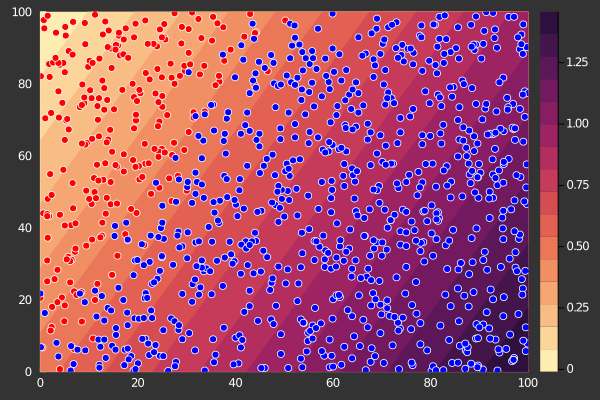

In [27]:
# plot decision probs
plot1 = X_train[Y_train .== 0, :]
plot2 = X_train[Y_train .== 1, :]
plot3 = collect(0:100)
plot_contour = hcat(vec(repeat(reshape(plot3, :, 1), 1, 101)'), vec(repeat(plot3, 101, 1)))
plot_contour = reshape(predict_proba(plot_contour, graph), 101, :)
Plots.gr()
Plots.contour(plot3, plot3, plot_contour, leg=true, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot1[:, 1], plot1[:, 2], leg=false, c="red")
Plots.scatter!(plot2[:, 1], plot2[:, 2], leg=false, c="blue")
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

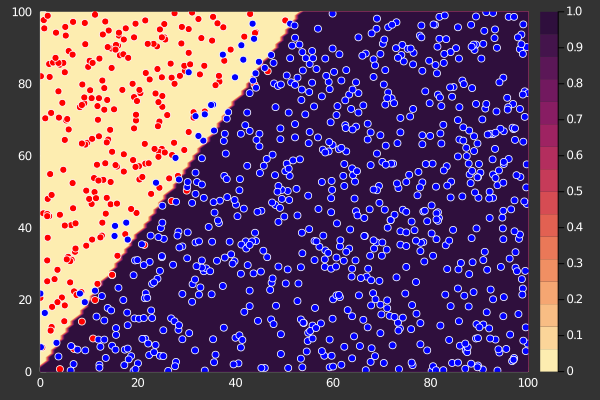

In [28]:
# plot decision boundary
plot1 = X_train[Y_train .== 0, :]
plot2 = X_train[Y_train .== 1, :]
plot3 = collect(0:100)
plot_contour = hcat(vec(repeat(reshape(plot3, :, 1), 1, 101)'), vec(repeat(plot3, 101, 1)))
plot_contour = reshape(predict(plot_contour, graph), 101, :)
Plots.gr()
Plots.contour(plot3, plot3, plot_contour, leg=true, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot1[:, 1], plot1[:, 2], leg=false, c="red")
Plots.scatter!(plot2[:, 1], plot2[:, 2], leg=false, c="blue")
Plots.xlims!((0.0, 100.0))
Plots.ylims!((0.0, 100.0))

In [29]:
JuTools.compute_accuracy(predict(X_train, graph), Y_train)

0.958

### About weights initialization
In current Neural Network setup, weights should __never__ be initialized to all zeros

For example:  
$$
\begin{aligned}
\frac{\partial C}{\partial W_2} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial I_3}\cdot\frac{\partial I_3}{\partial W_2} \\
&= \frac{1}{n}\sum^n_{i=1}(\hat{Y}-Y) \cdot (W_3) \cdot (I_2)
\end{aligned}
$$
where gradient of $W_2$ is dependent on $W_3$  

However, since:
$$
\begin{aligned}
\frac{\partial C}{\partial W_3} &= \frac{\partial C}{\partial \hat{Y}}\cdot\frac{\partial \hat{Y}}{\partial W_3} \\
&= \frac{1}{n}\sum^n_{i=1} (\hat{Y}-Y) \cdot (I_3)
\end{aligned}
$$
where gradient of $W_3$ is dependent on input of layer 3, which is computed from $W_2$

Both $W_2$ and $W_3$ will remain zeros during training  

Therefore, we need to initialize weights randomly  
But there are 2 problems:  
* If weights are too large, gradients will go infinity, which is called __exploding gradients__  
* If weights are too small, gradients will be near zero, which is called __vanishing gradients__  

In both cases, the network fails to learn  

Assume we want a weight $w$ of shape $(m,n)$  
To solve this issue, we have 2 methods to initialize a weight:  
* He Initialization  
$$w=\text{randn}\cdot\sqrt{\frac{2}{n}}$$  
* Xavier Initialization  
$$w=\text{randn}\cdot\sqrt{\frac{1}{n}}$$

And I use the following method:  
$$w=\text{randn}\cdot\sqrt{\frac{2}{m+n}}$$

### About learning rate  
A large learning rate makes weights go infinity, while a small learning rate makes learning very slow  

A better solution than fixed learning rate is to adjust learning rate based on gradient updates (Adaptive Learning Rate)  
Popular algorithms are:  
* RMSProp  
* Adagrad  
* Adam  

Other gradient descent optimization algorithms can be found [here](https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms)